# **Deep Learning Lab: Transfer Learning**

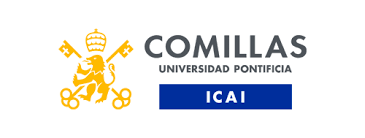

***

## Import packages

In [2]:
from cnn import CNN
import torchvision
from cnn import load_data
from cnn import load_model_weights
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [3]:
!pip freeze

altair==5.5.0
asttokens==3.0.0
attrs==25.3.0
blinker==1.9.0
cachetools==5.5.2
certifi==2025.1.31
charset-normalizer==3.4.1
click==8.1.8
colorama==0.4.6
comm==0.2.2
contourpy==1.3.1
cycler==0.12.1
debugpy==1.8.13
decorator==5.2.1
executing==2.2.0
filelock==3.18.0
fonttools==4.56.0
fsspec==2025.3.0
gitdb==4.0.12
GitPython==3.1.44
grad-cam==1.5.0
idna==3.10
imageio==2.37.0
ipykernel==6.26.0
ipython==9.0.2
ipython_pygments_lexers==1.1.1
jedi==0.19.2
Jinja2==3.1.6
joblib==1.4.2
jsonschema==4.23.0
jsonschema-specifications==2024.10.1
jupyter_client==8.6.3
jupyter_core==5.7.2
kiwisolver==1.4.8
lazy_loader==0.4
markdown-it-py==3.0.0
MarkupSafe==3.0.2
matplotlib==3.8.3
matplotlib-inline==0.1.7
mdurl==0.1.2
mpmath==1.3.0
narwhals==1.31.0
nest-asyncio==1.6.0
networkx==3.4.2
numpy==1.26.4
opencv-python==4.11.0.86
packaging==23.2
pandas==2.2.3
parso==0.8.4
pillow==10.2.0
platformdirs==4.3.7
prompt_toolkit==3.0.50
protobuf==4.25.6
psutil==7.0.0
pure_eval==0.2.3
pyarrow==19.0.1
pydeck==0.9.1
Pygments

## Model and data loading

In [4]:
# Pytorch has many pre-trained models that can be used for transfer learning
classification_models = torchvision.models.list_models(module=torchvision.models)
print(classification_models)

['alexnet', 'convnext_base', 'convnext_large', 'convnext_small', 'convnext_tiny', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'efficientnet_v2_l', 'efficientnet_v2_m', 'efficientnet_v2_s', 'googlenet', 'inception_v3', 'maxvit_t', 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', 'regnet_x_16gf', 'regnet_x_1_6gf', 'regnet_x_32gf', 'regnet_x_3_2gf', 'regnet_x_400mf', 'regnet_x_800mf', 'regnet_x_8gf', 'regnet_y_128gf', 'regnet_y_16gf', 'regnet_y_1_6gf', 'regnet_y_32gf', 'regnet_y_3_2gf', 'regnet_y_400mf', 'regnet_y_800mf', 'regnet_y_8gf', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50', 'resnext101_32x8d', 'resnext101_64x4d', 'resnext50_32x4d', 'shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'shufflenet_v2_x1_5', 'shufflenet_v2_x2_0', 'squeezenet1_0

In [5]:
# Load data and model 
train_dir = './dataset/training'
valid_dir = './dataset/validation'

train_loader, valid_loader, num_classes = load_data(train_dir, 
                                                    valid_dir, 
                                                    batch_size=32, 
                                                    img_size=224) # ResNet50 requires 224x224 images
model = CNN(torchvision.models.resnet50(weights='DEFAULT'), num_classes)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\Usuario/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:14<00:00, 6.98MB/s]


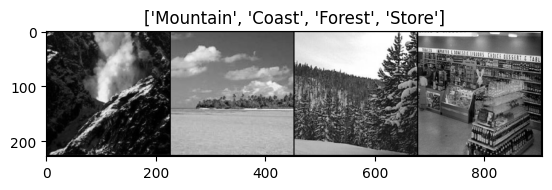

In [6]:
# Visualize a few images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a few random images
random_indices = np.random.choice(len(valid_loader.dataset), size=4, replace=False)
inputs = []
classes = []
for i in random_indices:
    inputs.append(valid_loader.dataset[i][0])
    classes.append(valid_loader.dataset[i][1])
out = torchvision.utils.make_grid(inputs)
classnames = train_loader.dataset.classes
imshow(out, title=[classnames[x] for x in classes])

## Train

In [7]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()
history = model.train_model(train_loader, valid_loader, optimizer, criterion, epochs=1)

Epoch 1/1 - Train Loss: 2.6489, Train Accuracy: 0.2224
Epoch 1/1 - Validation Loss: 2.5548, Validation Accuracy: 0.3867


In [8]:
model.save_model('resnet50-1epoch')

## Predict

#### Load model

In [9]:
# Load model
model_weights = load_model_weights('resnet50-1epoch')
my_trained_model = CNN(torchvision.models.resnet50(weights='DEFAULT'), num_classes)
my_trained_model.load_state_dict(model_weights)

<All keys matched successfully>

## Results

In [10]:
predicted_labels = my_trained_model.predict(valid_loader)

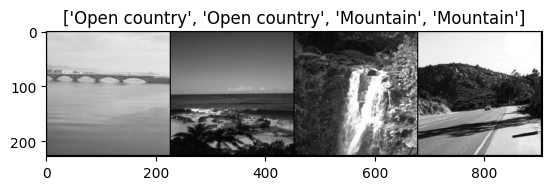

In [11]:
# Get a few random images
random_indices = np.random.choice(len(valid_loader.dataset), size=4, replace=False)
inputs = []
classes = []
for i in random_indices:
    inputs.append(valid_loader.dataset[i][0])
    classes.append(predicted_labels[i])

out = torchvision.utils.make_grid(inputs)
classnames = train_loader.dataset.classes
imshow(out, title=[classnames[x] for x in classes])
